# <center> House Price Prediction using XGBRegressor 

 in this notebook, we will try to train a XGBRegressor whitout data pre processing,
then we will see the resutls, 

In [1]:
!pip3 install scikit-optimize

     ------------------------------------ 100.3/100.3 kB 720.2 kB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import sklearn
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score



In [2]:
df=pd.read_csv("train.csv")
df.shape

(1460, 81)

In [3]:
#dtrain = xgboost.DMatrix(df,enable_categorical=True)
#dtrain= xgboost.DMatrix("train.csv")
#dtrain

In [4]:
X=df.drop(columns="SalePrice")
Y=df["SalePrice"]

In [5]:
num_df=X.select_dtypes(exclude="object")
cat_df=X.select_dtypes(include="object")
cat_df=cat_df.astype("category")
x=pd.concat([num_df,cat_df],axis=1)
#x.info()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=123)
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)

(1022, 80) (1022,) (438, 80) (438,)


In [76]:
model_=[]
score_=[]
def predict(ml_model):
    #print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    model_.append(type(ml_model).__name__)
    score_.append(np.round(r2score,2))
    
     
    sns.distplot(y_test-predictions)      
          

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=15, max_delta_step=None,
             max_depth=None, max_leaves=None, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, predictor=None,
             random_state=None, ...)
Training score: 0.9999564141966152
Predictions are: [233257.5   74635.64 137654.22 276416.4  139927.23]


r2 score is: 0.8665724673070948
MAE:765668039.1856399
MSE:765668039.1856399
RMSE:27670.707240430987


C:\Users\hp\AppData\Local\Temp\ipykernel_21344\3913721863.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


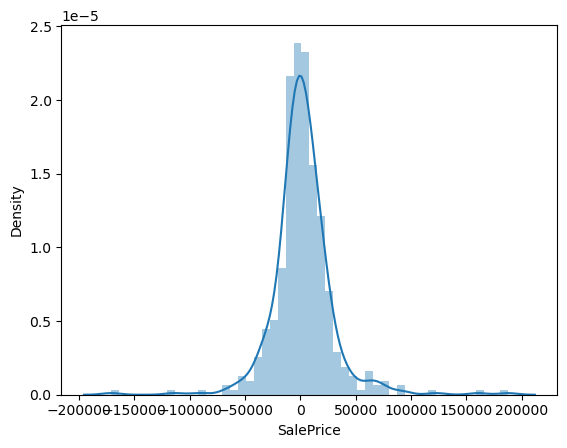

In [376]:
predict(XGBRegressor(tree_method="hist",
                     enable_categorical=True,
                     max_cat_to_onehot=15))

## Hyper Tunning XGBRegressor Model:

In [9]:
list(np.arange(0.1,1.0,0.1))
val=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [164]:
xgbr=XGBRegressor(enable_categorical=True,
                 tree_method="hist",
                 random_state=123,
                 max_cat_to_onehot=1)
param={
       #"booster":["gbtree", "gblinear","dart"],
       "objective":["reg:squarederror","reg:squaredlogerror"
                    ,"reg:pseudohubererror",
                    "reg:absoluteerror"],
       "colsample_bytree":val,
       "colsample_bylevel":val,
       "colsample_bynode":val,
       "reg_alpha":val,
       "reg_lambda":val,
       "subsample":val,
       #"gamma":[0,1,2,3,4,5],
       "learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],#to 0.3
       "max_delta_step":[1,2,3,4,5,6,7],
       "max_depth":[1,2,3,4,5,6,7,8],
       "n_estimators":[100,200,300,400,500,600,700,800,900,1000],#,800,900,1000],
       "min_child_weight":[1,2,3,4,5],
       #"max_cat_threshold":[1,5,10]
       
      
}

#scorer = metrics.make_scorer(metrics.r2_score)

rs_xgb=RandomizedSearchCV(estimator=xgbr,n_iter=300,cv=3,scoring="r2",
                          param_distributions=param,n_jobs=-1,verbose=1)

In [ ]:
predict(rs_xgb)

In [181]:
#sklearn.metrics.get_scorer_names()

In [427]:
rs_xgb.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.6,
 'reg_alpha': 0.2,
 'objective': 'reg:squarederror',
 'n_estimators': 600,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.03,
 'colsample_bytree': 0.8,
 'colsample_bynode': 0.6,
 'colsample_bylevel': 0.7}

In [341]:
xgb_best_param1=XGBRegressor(
 subsample =0.35,
 enable_categorical=True,
 tree_method="hist",
 random_state=123,
 reg_lambda= 0.2,
 reg_alpha= 0.8,
 n_estimators= 210,
 max_depth= 4,
 max_cat_to_onehot=1,
 learning_rate= 0.08,
 colsample_bytree= 0.9,
 colsample_bynode= 0.9,
 colsample_bylevel= 0.7,
)

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.9, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
             max_depth=4, max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=210, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=123, ...)
Training score: 0.9887826551131295
Predictions are: [221801.06 124476.86 141299.33 256231.4  146950.95]


r2 score is: 0.9133086105449743
MAE:497474732.8280446
MSE:497474732.8280446
RMSE:22304.14160706582


C:\Users\hp\AppData\Local\Temp\ipykernel_21344\3913721863.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


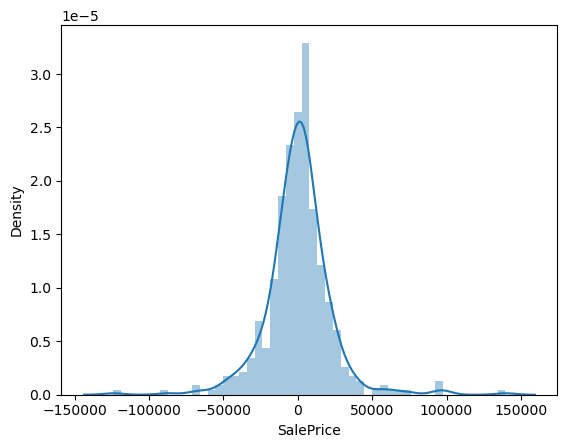

In [342]:
predict(xgb_best_param1)

Training score: 0.995421486660605
Predictions are: [223000.88 102189.59 138805.27 250691.47 137983.19]


r2 score is: 0.9181562070387199
MAE:469657013.14741427
MSE:469657013.14741427
RMSE:21671.571543093367


C:\Users\hp\AppData\Local\Temp\ipykernel_12524\3100297001.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


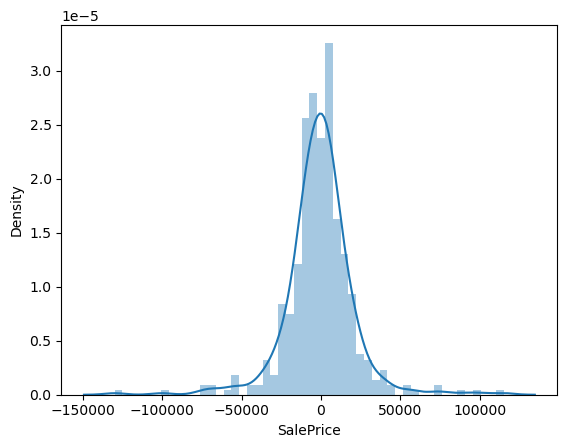

In [163]:
xgb_best_param2=XGBRegressor(
 subsample =0.731,
 enable_categorical=True,
 tree_method="hist",
 random_state=123,
 reg_lambda= 0.4631,
 reg_alpha= 0.4,
 n_estimators= 538,
 max_depth= 3,
 max_cat_to_onehot=1,
 learning_rate= 0.09,
 colsample_bytree= 0.29,
 colsample_bynode= 0.8,
 colsample_bylevel= 0.9,
 min_child_weight=0.8
)
predict(xgb_best_param2)

In [ ]:
test=pd.read_csv("test_house_price.csv")
num_df=test.select_dtypes(exclude="object")
cat_df=test.select_dtypes(include="object")
cat_df=cat_df.astype("category")
test_data=pd.concat([num_df,cat_df],axis=1)
test_data.info()

In [173]:
predictions=xgb_best_param2.predict(test_data)
predictions

array([125300.  , 159535.42, 177530.42, ..., 150169.4 , 114533.27,
       203819.42], dtype=float32)

In [180]:
submission=pd.DataFrame({"Id":range(1461,2920),"SalePrice":predictions},index= None)
submission.to_csv("House_Price_PredicSubm_xgbr_no_preprocessing.csv",index=False)

## Bayesian Grid Search

In [16]:
%%time
from skopt import BayesSearchCV
bayes_xgb = BayesSearchCV(xgbr,
                      search_spaces=param,
                      n_iter=100, cv=4)

CPU times: total: 15.6 ms
Wall time: 22.9 ms


Model is: BayesSearchCV(cv=4,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                             'min_child_weight': [1, 2, 3, 4, 5],
                             'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                    

C:\Users\hp\AppData\Local\Temp\ipykernel_12524\3913721863.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


CPU times: total: 56min 16s
Wall time: 20min 16s


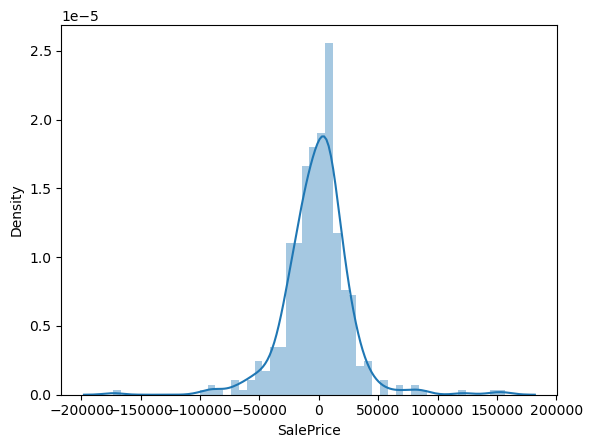

In [17]:
%%time
predict(bayes_xgb)

## Method 4: Using continuous Search Spaces for Bayesian Search

In [28]:
np.log(10**-5)

-11.512925464970229

In [39]:

bayes_space = XGBRegressor(enable_categorical=True,
                 tree_method="hist",
                 random_state=123,
                 max_cat_to_onehot=1)

space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Real(0.1, 1,"uniform", name='subsample'),
          Real(0.1,1,"uniform",name="colsample_bytree"),
          Real(0.1,1, "uniform", name="colsample_bylevel"),
          Real(0.1,1, "uniform", name="colsample_bynode"),
          Real(10**-5, 10**1, "uniform", name='gamma'),
          Real(10**-5, 10**0, "uniform", name='reg_alpha'),
          Real(10**-5, 10**0, "uniform", name='reg_lambda'),
          Integer(100,1000,name="n_estimators")] 

# The decorator below enables the objective function
# to receive the parameters as keyword arguments.
@use_named_args(space)
def objective(**params):
    '''
    Scitkit Learn Optimize requires an objective function to minimize.
    We use the average of cross-validation mean absolute errors as 
    the objective function (also called cost function in optimization)
    '''
    xgb.set_params(**params)

    return -np.mean(cross_val_score(xgb, x_train, y_train, cv=4, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [40]:
%%time 
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=123)

CPU times: total: 11 s
Wall time: 59.8 s


Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7667184876028318,
             colsample_bynode=0.89562332187716,
             colsample_bytree=0.9990996713807268, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.646195169234585, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.291693078198066, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
             max_depth=19, max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=113, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=123, ...)
[13:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "reg_ga

C:\Users\hp\AppData\Local\Temp\ipykernel_6080\3913721863.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


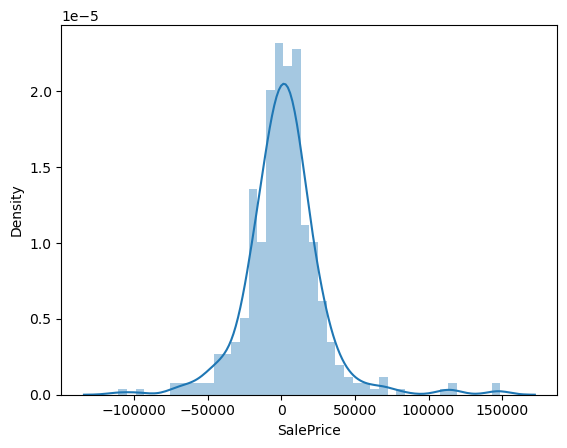

In [41]:
predict(xgb)

In [42]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7667184876028318,
             colsample_bynode=0.89562332187716,
             colsample_bytree=0.9990996713807268, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.646195169234585, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.291693078198066, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
             max_depth=19, max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=113, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=123, ...)